In [1]:
#load neccessary python packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [3]:
os.getcwd()

'/Users/HOME/Desktop/ICR_Kaggle/icr-identify-age-related-conditions'

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [7]:
data.shape

(617, 58)

In [9]:
greeks = pd.read_csv("greeks.csv")
greeks.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [11]:
greeks.shape

(617, 6)

In [12]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [13]:
greeks.describe()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
count,617,617,617,617,617,617
unique,617,4,3,8,4,198
top,000ff2bfdfe9,A,C,M,B,Unknown
freq,1,509,407,445,456,144


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [16]:
data["EJ"].nunique()

2

In [18]:
data["EJ"].unique()

array(['B', 'A'], dtype=object)

In [19]:
data["EJ"].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [21]:
data["Class"].value_counts()

0    509
1    108
Name: Class, dtype: int64

In [22]:
data.count()

Id       617
AB       617
AF       617
AH       617
AM       617
AR       617
AX       617
AY       617
AZ       617
BC       617
BD       617
BN       617
BP       617
BQ       557
BR       617
BZ       617
CB       615
CC       614
CD       617
CF       617
CH       617
CL       617
CR       617
CS       617
CU       617
CW       617
DA       617
DE       617
DF       617
DH       617
DI       617
DL       617
DN       617
DU       616
DV       617
DY       617
EB       617
EE       617
EG       617
EH       617
EJ       617
EL       557
EP       617
EU       617
FC       616
FD       617
FE       617
FI       617
FL       616
FR       617
FS       615
GB       617
GE       617
GF       617
GH       617
GI       617
GL       616
Class    617
dtype: int64

In [24]:
data.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [108]:
data.columns = data.columns.str.strip()

In [86]:
data['Class']= data['Class'].astype("category")

In [94]:
data.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [114]:
data.isna().sum()[data.isna().sum() > 0].sort_values(ascending = False)

BQ    60
EL    60
CC     3
CB     2
FS     2
DU     1
FC     1
FL     1
GL     1
dtype: int64

In [151]:
#!pip install missingno

<Axes: >

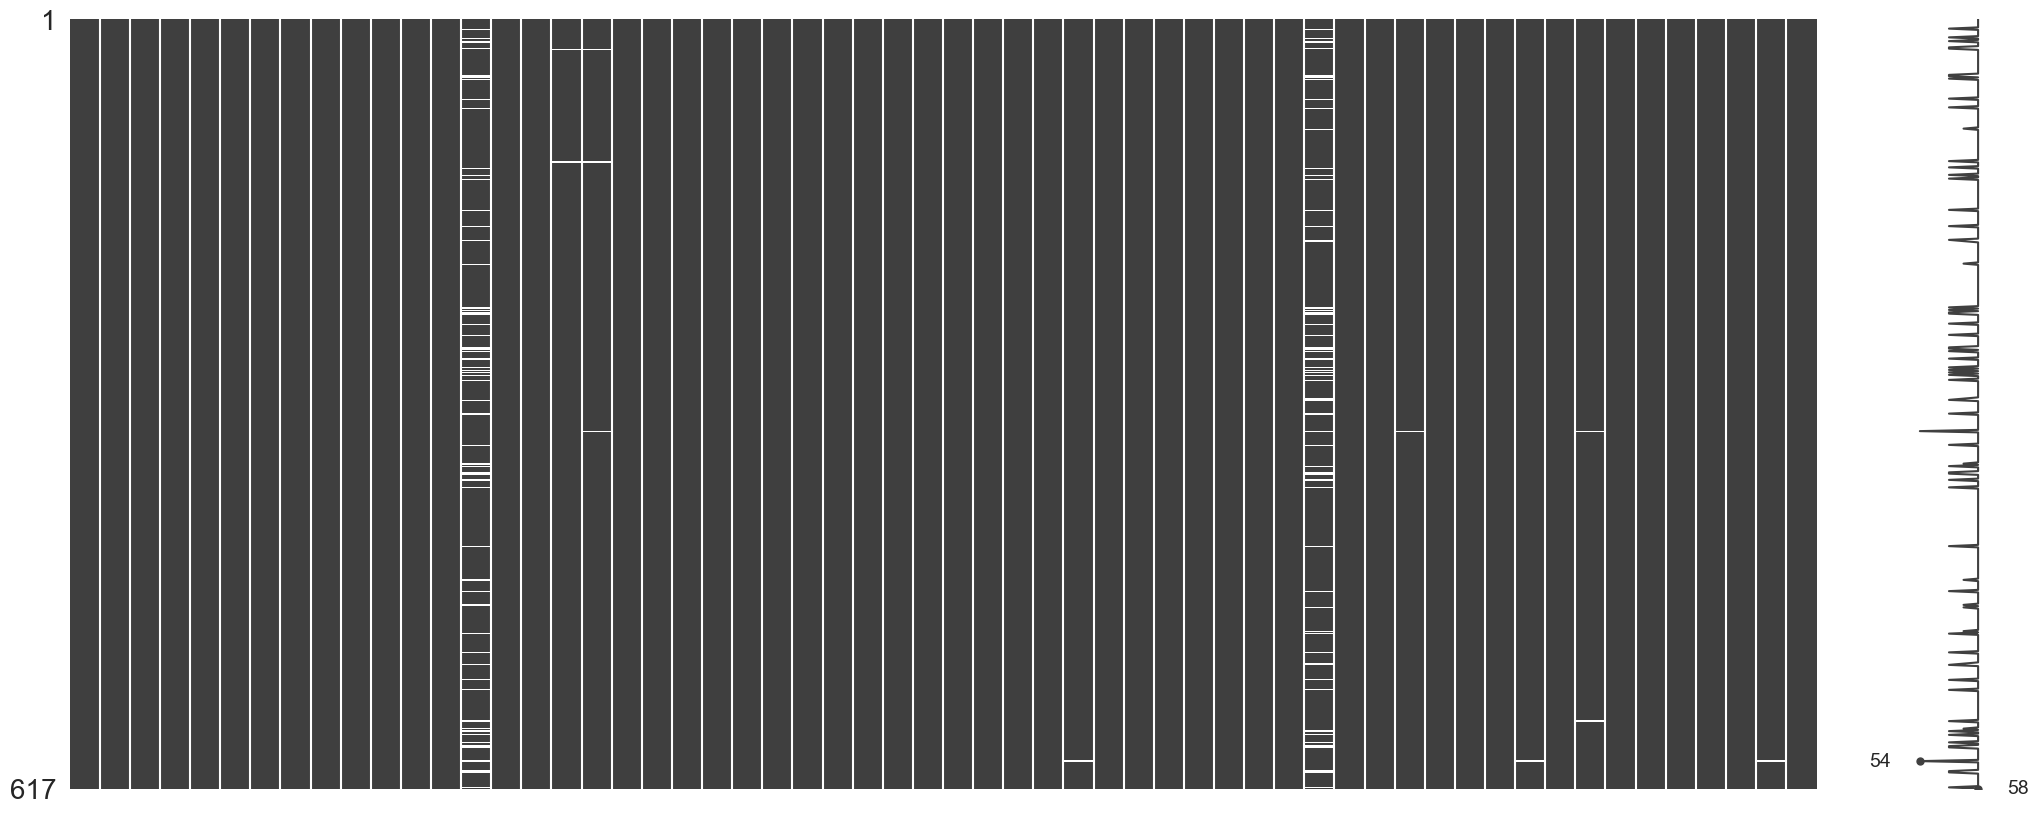

In [144]:
msno.matrix(data)

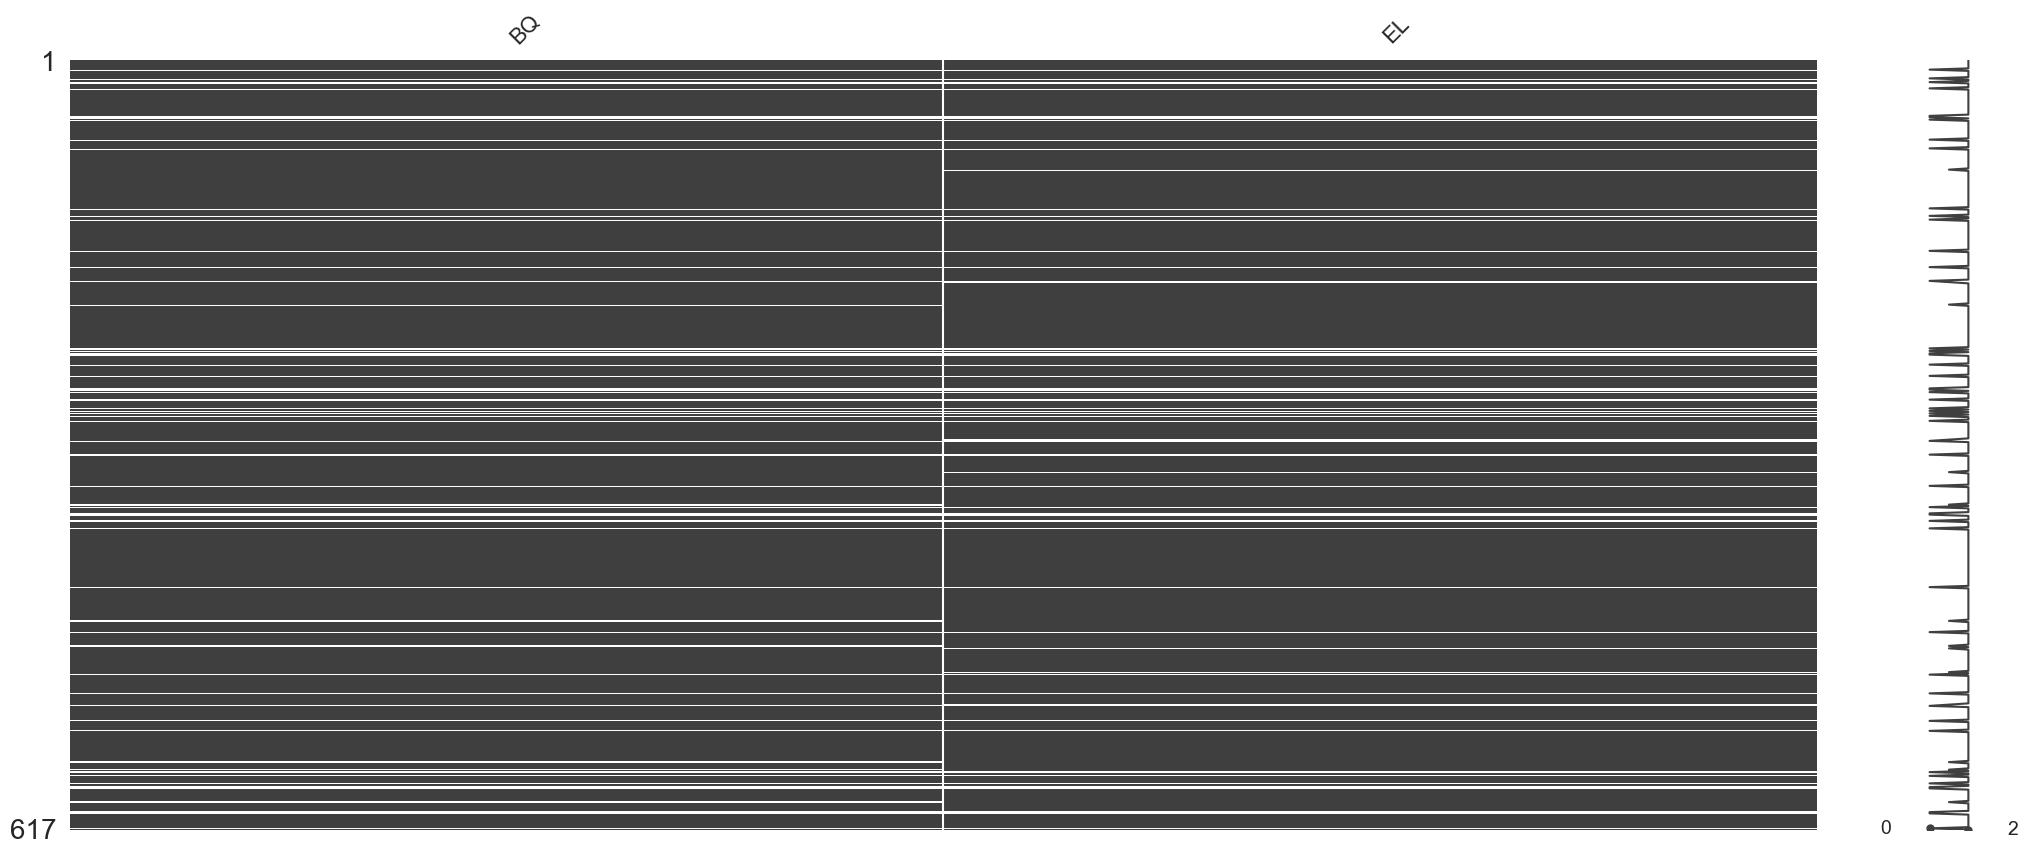

In [119]:
#visualizing missingness
import missingno as msno
msno.matrix(data[['BQ','EL']])
plt.show()

In [142]:
z = data[['BQ','EL']]
sum(z[['BQ']].isna().values == z[['EL']].isna().values)/len(z)

array([0.97730956])

In [163]:
data.isna().sum()[data.isna().sum() > 0].index.values

array(['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL'], dtype=object)

In [164]:
data[['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']].agg(['min','max'])

,BQ,CB,CC,DU,EL,FC,FL,FS,GL
min,1.331155,12.499760,0.176874,0.005518,5.394675,7.534128,0.173229,0.067730,0.001129
max,344.644105,2271.436167,4.103032,161.355315,109.125159,3030.655824,137.932739,31.365763,21.978000


In [177]:
data['BQ'].fillna(data['BQ'].median(),inplace = True)
data['CB'].fillna(data['CB'].median(),inplace = True)
data['CC'].fillna(data['CC'].median(),inplace = True)
data['DU'].fillna(data['DU'].median(),inplace = True)
data['EL'].fillna(data['EL'].median(),inplace = True)
data['FC'].fillna(data['FC'].median(),inplace = True)
data['FL'].fillna(data['FL'].median(),inplace = True)
data['FS'].fillna(data['FS'].median(),inplace = True)
data['GL'].fillna(data['GL'].median(),inplace = True)

In [178]:
data.isna().sum()

Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

In [92]:
greeks.columns

Index(['Id', 'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon'], dtype='object')

In [97]:
greeks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       617 non-null    object
 1   Alpha    617 non-null    object
 2   Beta     617 non-null    object
 3   Gamma    617 non-null    object
 4   Delta    617 non-null    object
 5   Epsilon  617 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


In [98]:
greeks.isna().sum()

Id         0
Alpha      0
Beta       0
Gamma      0
Delta      0
Epsilon    0
dtype: int64

In [99]:
set(data["Id"]) == set(greeks["Id"])

True

In [100]:
greeks["Alpha"].value_counts()

A    509
B     61
G     29
D     18
Name: Alpha, dtype: int64

In [101]:
greeks["Beta"].value_counts()

C    407
B    202
A      8
Name: Beta, dtype: int64

In [102]:
greeks["Gamma"].value_counts()

M    445
N     64
H     53
B     18
A     11
F     10
G      8
E      8
Name: Gamma, dtype: int64

In [103]:
greeks["Delta"].value_counts()

B    456
A     75
C     64
D     22
Name: Delta, dtype: int64

In [179]:
final_data = pd.merge(data,greeks,how = 'left',on = 'Id')
final_data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [155]:
final_data.shape

(617, 63)

In [156]:
data.shape,greeks.shape

((617, 58), (617, 6))

In [182]:
final_data.to_csv("data_wrangling.csv")

In [158]:
final_data.round(3)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209,3109.033,85.200,22.394,8.139,0.700,0.026,9.812,5.556,...,2003.810,22.136,69.835,0.120,1,B,C,G,D,3/19/2019
1,007255e47698,0.145,978.764,85.200,36.969,8.139,3.632,0.026,13.518,1.230,...,27981.563,29.135,32.132,21.978,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470,2635.107,85.200,32.361,8.139,6.733,0.026,12.825,1.230,...,13676.958,28.023,35.193,0.197,0,A,C,M,B,Unknown
3,043ac50845d5,0.252,3819.652,120.202,77.112,8.139,3.685,0.026,11.054,1.230,...,2094.262,39.949,90.493,0.156,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380,3733.048,85.200,14.104,8.139,3.942,0.055,3.397,102.152,...,8524.371,45.381,36.263,0.097,1,D,B,F,B,3/25/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.150,3130.059,123.764,9.514,13.021,3.499,0.077,8.546,2.804,...,8095.933,24.640,69.192,21.978,0,A,B,M,B,9/13/2020
613,fd895603f071,0.436,5462.034,85.200,46.551,15.973,5.980,0.026,12.623,3.778,...,3085.308,29.649,124.809,0.145,0,A,B,M,B,9/8/2020
614,fd8ef6377f76,0.427,2459.107,130.139,55.356,10.006,8.071,0.026,15.408,1.230,...,6474.653,26.166,119.559,21.978,0,A,C,M,B,7/24/2019
615,fe1942975e40,0.363,1263.535,85.200,23.686,8.139,7.982,0.026,7.525,1.230,...,1965.343,25.117,37.155,0.185,0,A,C,M,B,1/31/2019


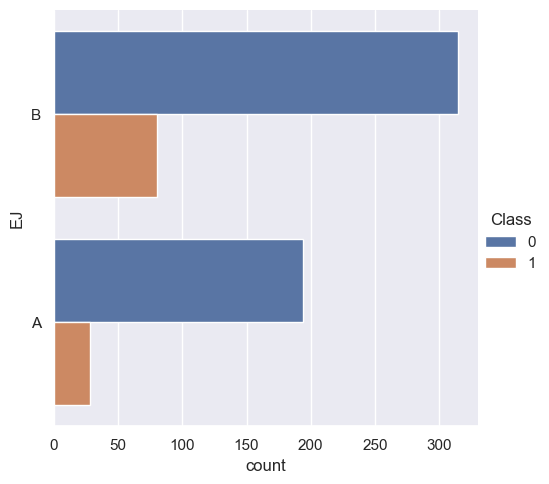

In [84]:

sns.set(style="darkgrid")
# plt.figure(figsize = (10,10))
sns.catplot(y = "EJ",data = data,kind = 'count',hue = 'Class')
plt.show()

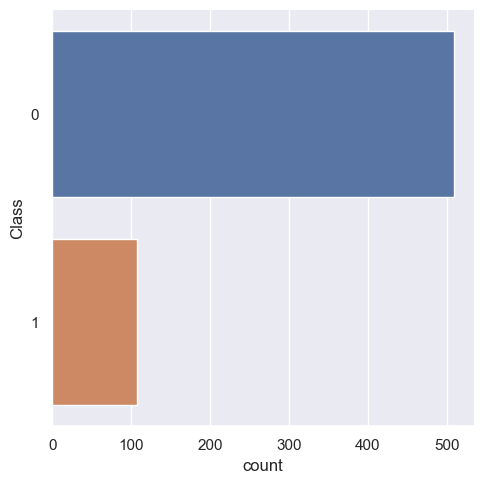

In [91]:
data['Class']= data['Class'].astype("category")
sns.catplot(y = 'Class',data =data,kind = 'count')